In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/dataset.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
1,105,95,50,27.333690,83.676752,5.849076,101.049479,banana
2,108,92,53,27.400536,82.962213,6.276800,104.937800,banana
3,86,76,54,29.315908,80.115857,5.926825,90.109781,banana
4,80,77,49,26.054330,79.396545,5.519088,113.229737,banana


In [4]:
df.shape

(2200, 8)

In [5]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

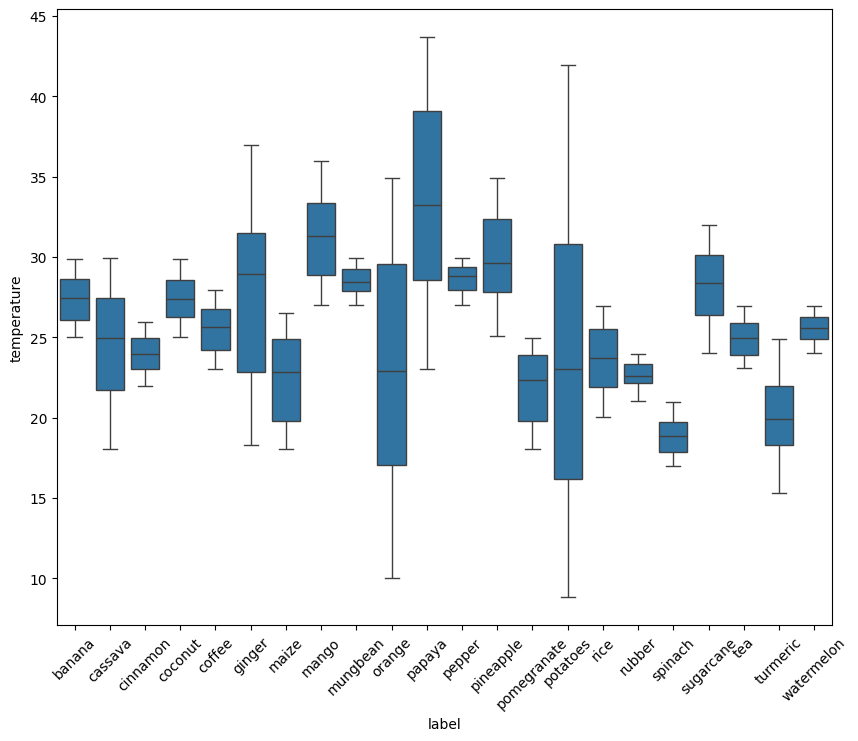

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=45)
plt.show()

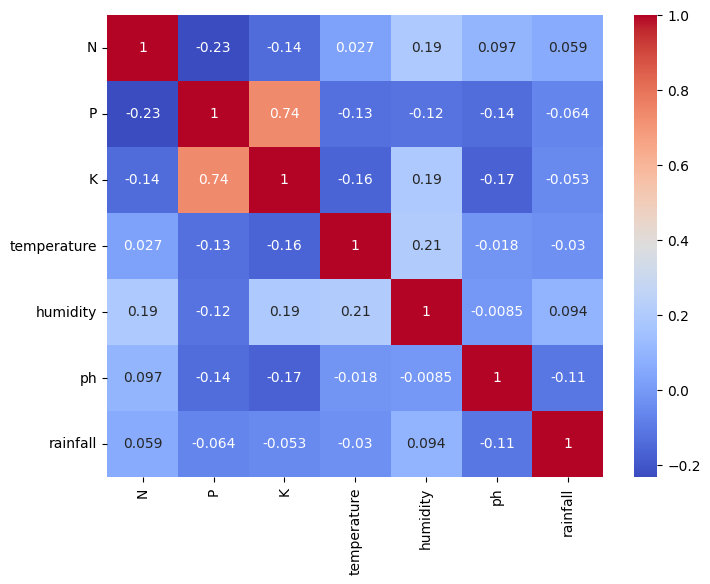

In [12]:
corr = df.drop('label', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

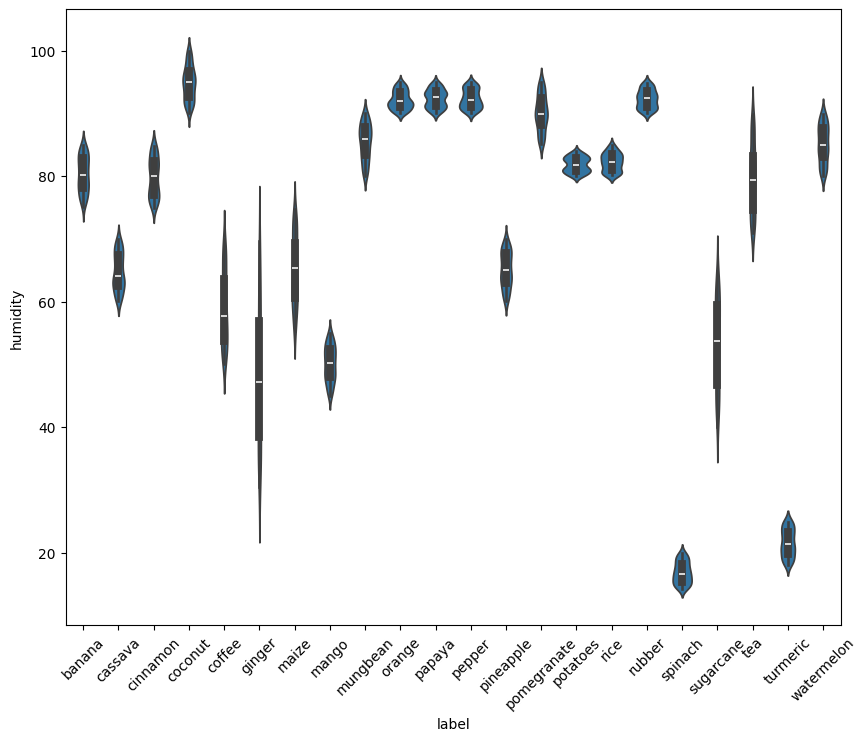

In [13]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='label', y='humidity', data=df)
plt.xticks(rotation=45)
plt.show()

In [14]:
df['label'].unique()

array(['banana', 'cassava', 'cinnamon', 'coconut', 'coffee', 'ginger',
       'maize', 'mango', 'mungbean', 'orange', 'papaya', 'pepper',
       'pineapple', 'pomegranate', 'potatoes', 'rice', 'rubber',
       'spinach', 'sugarcane', 'tea', 'turmeric', 'watermelon'],
      dtype=object)

In [15]:
df['label'].value_counts()

label
banana         100
cassava        100
turmeric       100
tea            100
sugarcane      100
spinach        100
rubber         100
rice           100
potatoes       100
pomegranate    100
pineapple      100
pepper         100
papaya         100
orange         100
mungbean       100
mango          100
maize          100
ginger         100
coffee         100
coconut        100
cinnamon       100
watermelon     100
Name: count, dtype: int64

In [16]:
X = df.drop('label', axis=1)
y = df['label']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [19]:
accuracy_list = []
model_list = []

In [20]:
from sklearn.metrics import accuracy_score, classification_report

rf_predictions = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
accuracy_list.append(rf_acc)
model_list.append('Random Forest')
print("Accuracy:", rf_acc*100)
print("Classification Report:\n", classification_report(y_test, rf_predictions))

lr_predictions = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predictions)
accuracy_list.append(lr_acc)
model_list.append('Linear Regression')
print("Accuracy:", lr_acc*100)
print("Classification Report:\n", classification_report(y_test, lr_predictions))

dt_predictions = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
accuracy_list.append(dt_acc)
model_list.append('Decision Tree')
print("Accuracy:", dt_acc*100)
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
     cassava       1.00      1.00      1.00        21
    cinnamon       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        18
      ginger       1.00      1.00      1.00        19
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        17
      papaya       1.00      1.00      1.00        17
      pepper       1.00      1.00      1.00        26
   pineapple       1.00      1.00      1.00        18
 pomegranate       1.00      1.00      1.00        15
    potatoes       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        13
      rubber       1.00      1.00      1.

In [21]:
from sklearn.model_selection import cross_val_score

dt_score = cross_val_score(dt_model, X, y, cv=5)
dt_score

rf_score = cross_val_score(rf_model, X, y, cv=5)
rf_score

lr_score = cross_val_score(lr_model, X, y, cv=5)
lr_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.97045455, 0.96590909, 0.97954545, 0.96818182, 0.96818182])

<ipython-input-22-9788ae9cfac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = accuracy_list, y = model_list, palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

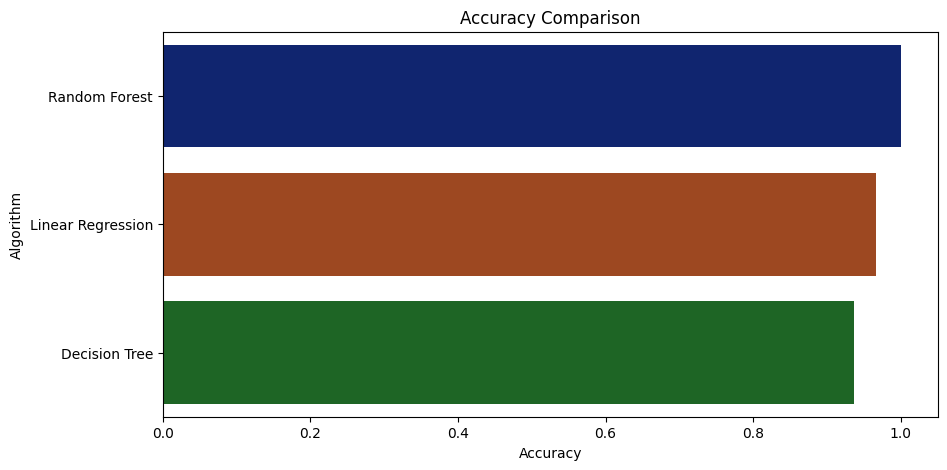

In [22]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy_list, y = model_list, palette='dark')

In [23]:
accuracy_models = dict(zip(model_list, accuracy_list))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Random Forest --> 1.0
Linear Regression --> 0.9659090909090909
Decision Tree --> 0.9363636363636364


**Modal prediction with sample data**

In [24]:
new_data = {
    'N': [104],
    'P': [18],
    'K': [30],
    'temperature': [23.603016],
    'humidity': [60.3],
    'ph': [6.7],
    'rainfall': [140.91]
}

new_data_df = pd.DataFrame(new_data)

In [25]:
predicted_label = rf_model.predict(new_data_df)
print("Predicted Crop Type:", predicted_label[0])

Predicted Crop Type: coffee


In [26]:
import pickle

In [27]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)